In [2]:
import os
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import numpy as np


In [5]:
count_zero = 0
count_one = 0
count_two=0
data = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/predict/multi_state_train_data_v2_test_delhi_sarath_grid_obb_v2__1120_1002/labels/"
for filename in os.listdir(data):
    if filename.endswith('.txt'):
        with open(data+filename,'r') as f:
            for line in f:
                values = line.split()
                if values[0] == '0':
                    count_zero += 1
                elif values[0] == '1':
                    count_one += 1
                elif values[0] == '2':
                    print(data+filename)
                    count_two +=1
                else:
                    print("Error")

print("Count of 0: ", count_zero)

print("Count of 1: ", count_one)

print("Count of 2: ", count_two)


/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/predict/multi_state_train_data_v2_test_delhi_sarath_grid_obb_v2__1120_1002/labels/28.45,77.64.txt
/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/predict/multi_state_train_data_v2_test_delhi_sarath_grid_obb_v2__1120_1002/labels/28.26,77.61.txt
Count of 0:  36
Count of 1:  913
Count of 2:  2


In [7]:
# data="/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/multi_state_data_v1/labels/"
for filename in os.listdir(data):
    if filename.endswith('.txt'):
        filepath = data+filename
        with open(data+filename,'r') as f:            
            lines = f.readlines()
        modified_lines = []
        for line in lines:
            values = line.strip().split()
            # Drop the last value
            modified_line = " ".join(values[:-1]) 
            modified_lines.append(modified_line)
        
        # Write the modified lines back to the file
        with open(filepath, 'w') as f:
            f.write("\n".join(modified_lines) + "\n")

print("Last column dropped from all .txt files.")

Last column dropped from all .txt files.


<Axes: >

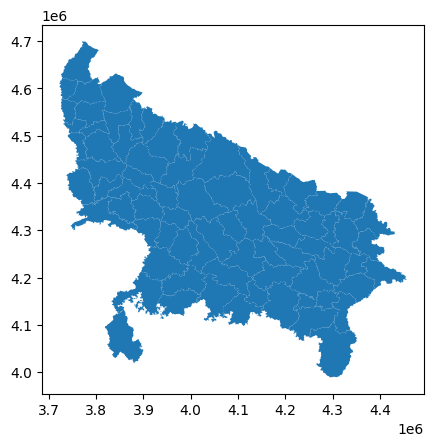

In [8]:
data="/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/multi_state_data_v1/labels/"

shape_file = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/shapefiles/india_districtwise_shapefile_2022/DISTRICT_BOUNDARY.shp"
shape = gpd.read_file(shape_file)
# select only state of Uttar Pradesh
shape = shape[shape['STATE'] == 'UTTAR PRADESH']
# print(shape.tail())
# print(shape.shape)
#visualize the shapefile
shape.plot()

In [9]:
#print the column names
print(shape.columns)
#print Districts of Uttar Pradesh
# print(shape['District'])
shape['District'] = shape['District'].str.replace('>', 'A')
shape['District'] = shape['District'].str.replace('|', 'I')

# print(shape['District'])
#print all unique districts
print(shape['District'].unique())

Index(['District', 'STATE', 'REMARKS', 'State_LGD', 'DISTRICT_L', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')
['AGRA' 'ALIGARH' 'AMBEDKARNAGAR' 'AMETHI' 'AMROHA' 'AURAIYA' 'AZAMGARH'
 'BUDAUN' 'BAGHPAT' 'BAHRAICH' 'BALLIA' 'BALRAMPUR' 'BANDA' 'BARABANKI'
 'BAREILLY' 'BASTI' 'BHADOHI' 'BIJNOR' 'BULANDSHAHR' 'CHANDAULI'
 'CHITRAKOOT' 'DEORIA' 'AYODHYA' 'ETAH' 'ETAWAH' 'FARRUKHABAD' 'FATEHPUR'
 'FIROZABAD' 'GAUTAMBUDHNAGAR' 'GAZIPUR' 'GHAZIABAD' 'GONDA' 'GORAKHPUR'
 'HAMIRPUR' 'HAPUR' 'HARDOI' 'HATHRAS' 'JALAUN' 'JAUNPUR' 'JHANSI'
 'KANNAUJ' 'KANPUR' 'KANPUR DEHAT' 'KASGANJ' 'KAUSHAMBI' 'KHERI'
 'KUSHINAGAR' 'LALITPUR' 'LUCKNOW' 'MAHOBA' 'MAINPURI' 'MATHURA' 'MAU'
 'MEERUT' 'MIRZAPUR' 'MORADABAD' 'MUZAFFARNAGAR' 'PILIBHIT' 'PRATAPGARH'
 'RAIBEARELI' 'RAMPUR' 'SAHARANPUR' 'SAMBHAL' 'SANTKABIRNAGAR'
 'SHAHJAHANPUR' 'SHAMLI' 'SHRAWASTI' 'SIDDHARTHNAGAR' 'SITAPUR'
 'SONBHADRA' 'SULTANPUR' 'UNNAO' 'VARANASI' 'PRAYAGRAJ' 'MAHARAJGANJ']


    District          STATE REMARKS  State_LGD DISTRICT_L     Shape_Leng  \
30  AZAMGARH  UTTAR PRADESH    None          9        123  498671.919852   

      Shape_Area                                           geometry  
30  4.057542e+09  POLYGON ((4286924.163 4264884.966, 4287385.646...  


[]

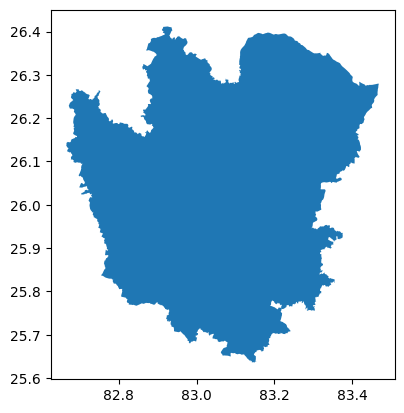

In [12]:
#plot the district == PRAYAGRAJ
praygraj=shape[shape['District'] == 'AZAMGARH']
print(praygraj)
praygraj=praygraj.to_crs(epsg=4326).plot()
praygraj.plot()

In [19]:
prayagraj_data = shape[shape['District'] == 'AZAMGARH']
prayagraj_data=prayagraj_data.to_crs(epsg=4326)
# Ensure 'geometry' column exists in prayagraj_data for spatial queries
prayagraj_geom = prayagraj_data['geometry'].iloc[0]  # Get the geometry of PRAYAGRAJ district
# print(prayagraj_geom)
count_inside=0
txt_files = [f for f in os.listdir(data) if f.endswith('.txt')]
for file in txt_files:
    try:
        # (e.g., "22.15,85.49.txt")
        lat, lon = map(float, file.replace('.txt', '').split(','))
        # Create a Shapely Point for the lat-lon pair
        point = Point(lon, lat)  # Shapely uses (lon, lat) format
        if prayagraj_geom.contains(point):
            # print(f"Lat: {lat}, Lon: {lon} in file '{file}' is inside PRAYAGRAJ district.")
            count_inside+=1
        # else:
            # print(f"Lat: {lat}, Lon: {lon} in file '{file}' is outside PRAYAGRAJ district.")
    except ValueError:
        print(f"Skipping file '{file}' due to incorrect lat-lon format.")

print(f"Total count of points inside PRAYAGRAJ district: {count_inside}")


Total count of points inside PRAYAGRAJ district: 317


In [8]:
# import os

# # Path to your image and label data
# image_data = "/mnt/dataset/brick_kilns/raw_data/uttar_pradesh/"
# processed_data_dir = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/up_10803_v1/images"

# # Ensure the processed data directory exists
# os.makedirs(processed_data_dir, exist_ok=True)

# # List all .txt files in the directory
# txt_files = [f for f in os.listdir(data) if f.endswith('.txt')]

# count_image = 0
# # Iterate over the .txt files
# for file in txt_files:
#     # Extract lat and lon from the .txt file name (e.g., "22.15,85.49.txt")
#     lat, lon = map(float, file.replace('.txt', '').split(','))
        
#     # Construct the corresponding .png image file name
#     base_filename = file.replace('.txt', '')
#     image_file = os.path.join(image_data, base_filename + '.png')
    
#     # Check if the corresponding .png image file exists
#     if os.path.exists(image_file):
#         count_image += 1
#         symlink_path = os.path.join(processed_data_dir, base_filename + '.png')

#         # Create a symlink to the image file
#         try:
#             os.symlink(image_file, symlink_path)
#             print(f"Symlink created: {symlink_path} -> {image_file}")
#         except FileExistsError:
#             print(f"Symlink already exists: {symlink_path}")
            
# print(f"Total count of image files: {count_image}")

In [ ]:
import os
from tqdm import tqdm
data="/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/lucknow_labels_with_cfcbk"

# Path to your image and label data
image_data = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/up_sarath_data_v1/images"
processed_data_dir = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/lucknow_labels_with_cfcbk/images"
# print(os.listdir(image_data))
os.makedirs(processed_data_dir, exist_ok=True)
txt_files = [f for f in os.listdir(data) if f.endswith('.txt')]
print(txt_files)
count_image = 0
# Iterate over the .txt files
for file in tqdm(txt_files, desc="Processing files", unit="file"):
    # Extract lat and lon from the .txt file name (e.g., "22.15,85.49.txt")
    lat, lon = map(float, file.replace('.txt', '').split(','))
        
    base_filename = file.replace('.txt', '')
    print(base_filename)    
    # print(base_filename)
    image_file = os.path.join(image_data, base_filename + '.png')
    print(image_file)
    # print(image_file)
    if os.path.exists(image_file):
        count_image+=1
        os.system(f"cp {image_file} {processed_data_dir}")      
print(f"Total count of image files: {count_image}")

        

In [6]:
# import os
# from tqdm import tqdm

# data = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/multi_state_data_v1/labes/"
# image_data_dirs = [
#     "/home/patel_zeel/kilns_neurips24/corrected_txt_obb/uttar_pradesh/",
#     "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/png_data/bihar/",
#     "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/png_data/haryana/",
#     "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/png_data/punjab/",
#     "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/png_data/west_bengal/"
# ]
# processed_data_dir = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/multi_state_data_v1/images"

# # Ensure the processed_data_dir exists
# os.makedirs(processed_data_dir, exist_ok=True)

# txt_files = [f for f in os.listdir(data) if f.endswith('.txt')]
# count_image = 0

# # Iterate over the .txt files
# for file in tqdm(txt_files, desc="Processing files", unit="file"):
#     # Extract lat and lon from the .txt file name (e.g., "22.15,85.49.txt")
#     lat, lon = map(float, file.replace('.txt', '').split(','))
    
#     base_filename = file.replace('.txt', '')
    
#     # Check each directory for the image file
#     image_found = False
#     for image_data in image_data_dirs:
#         image_file = os.path.join(image_data, base_filename + '.png')
        
#         if os.path.exists(image_file):
#             count_image += 1
#             symlink_path = os.path.join(processed_data_dir, base_filename + '.png')
            
#             # Create the symbolic link if it doesn't already exist
#             if not os.path.exists(symlink_path):
#                 os.symlink(image_file, symlink_path)
                
#             image_found = True
#             break  # Stop searching once the image is found in one directory
    
#     if not image_found:
#         print(f"Image not found for {base_filename}")

# print(f"Total count of image files: {count_image}")

Processing files:  77%|███████▋  | 16045/20881 [00:00<00:00, 80253.66file/s]

Image not found for 22.59,85.91
Image not found for 22.85,84.81
Image not found for 22.53,85.78
Image not found for 22.75,86.31
Image not found for 22.71,84.44
Image not found for 22.26,86.78
Image not found for 22.87,86.14
Image not found for 22.74,85.57
Image not found for 22.57,84.52
Image not found for 22.77,86.31
Image not found for 22.61,84.58
Image not found for 22.59,84.37
Image not found for 22.50,86.52
Image not found for 22.79,85.84
Image not found for 22.83,84.80
Image not found for 22.44,84.91
Image not found for 22.68,84.51
Image not found for 22.15,85.49
Image not found for 22.42,84.68
Image not found for 22.63,84.44
Image not found for 22.69,85.55
Image not found for 22.50,86.22
Image not found for 22.85,84.89
Image not found for 22.42,84.67
Image not found for 22.64,86.04
Image not found for 22.51,86.49
Image not found for 22.70,85.54
Image not found for 22.72,85.57
Image not found for 22.76,84.78
Image not found for 22.59,86.53
Image not found for 22.73,85.57
Image no

Processing files: 100%|██████████| 20881/20881 [00:00<00:00, 79882.51file/s]

Image not found for 22.54,86.18
Image not found for 22.81,84.78
Image not found for 22.73,86.39
Image not found for 22.73,85.56
Image not found for 22.78,86.01
Image not found for 22.67,84.50
Image not found for 22.61,85.83
Image not found for 22.45,84.91
Image not found for 22.76,86.17
Image not found for 22.22,85.83
Image not found for 22.65,84.87
Image not found for 22.68,84.87
Image not found for 22.65,84.43
Image not found for 22.37,86.60
Image not found for 22.26,86.79
Image not found for 22.64,86.05
Image not found for 22.75,86.32
Image not found for 22.57,86.47
Image not found for 22.82,85.83
Image not found for 22.78,85.90
Image not found for 22.40,86.59
Image not found for 22.52,84.24
Image not found for 22.65,84.86
Image not found for 22.61,86.53
Image not found for 22.45,84.90
Total count of image files: 20782


In [ ]:
import os
from tqdm import tqdm
data="/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/lucknow_sarath_label_grids_with_cfcbk"

# Path to your image and label data
image_data_dir = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/up_sarath_data_v1/images"
processed_data_dir = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/lucknow_sarath_label_grids_with_cfcbk/images"
os.makedirs(processed_data_dir, exist_ok=True)
txt_files = [f for f in os.listdir(data) if f.endswith('.txt')]
count_image = 0

# Iterate over the .txt files
for file in tqdm(txt_files, desc="Processing files", unit="file"):
    # Extract lat and lon from the .txt file name (e.g., "22.15,85.49.txt")
    lat, lon = map(float, file.replace('.txt', '').split(','))
    
    base_filename = file.replace('.txt', '')
    
    # Check each directory for the image file
    image_found = False
    for image_data in image_data_dir:
        image_file = os.path.join(image_data, base_filename + '.png')
        
        if os.path.exists(image_file):
            count_image += 1
            os.system(f"cp {image_file} {processed_data_dir}")
            image_found = True
            break  # Stop searching once the image is found in one directory
    
    if not image_found:
        print(f"Image not found for {base_filename}")

print(f"Total count of image files: {count_image}")

In [14]:
import os
import random
import shutil
from tqdm import tqdm

# Directories
image_dir = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/multi_state_data_v1/images"
label_dir = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/multi_state_data_v1/labels"
train_image_dir = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/multi_state_data_v1/train/images"
train_label_dir = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/multi_state_data_v1/train/labels"
test_image_dir = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/multi_state_data_v1/test/images"
test_label_dir = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/multi_state_data_v1/test/labels"

# Ensure train/test directories exist
os.makedirs(train_image_dir, exist_ok=True)
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(test_image_dir, exist_ok=True)
os.makedirs(test_label_dir, exist_ok=True)

# Collect all image files
image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]
random.shuffle(image_files)

# Compute the 80:20 split
split_index = int(0.8 * len(image_files))
train_files = image_files[:split_index]
test_files = image_files[split_index:]

# Copy train files
for file in tqdm(train_files, desc="Copying train files", unit="file"):
    image_file = os.path.join(image_dir, file)
    label_file = os.path.join(label_dir, file.replace('.png', '.txt'))
    
    # Copy image and label
    if os.path.exists(label_file):  # Ensure the corresponding label exists
        shutil.copy(image_file, os.path.join(train_image_dir, file))
        shutil.copy(label_file, os.path.join(train_label_dir, file.replace('.png', '.txt')))
    else:
        print(f"Label not found for {file}")

# Copy test files
for file in tqdm(test_files, desc="Copying test files", unit="file"):
    image_file = os.path.join(image_dir, file)
    label_file = os.path.join(label_dir, file.replace('.png', '.txt'))
    
    # Copy image and label
    if os.path.exists(label_file):  # Ensure the corresponding label exists
        shutil.copy(image_file, os.path.join(test_image_dir, file))
        shutil.copy(label_file, os.path.join(test_label_dir, file.replace('.png', '.txt')))
    else:
        print(f"Label not found for {file}")

print("Train/Test split completed with file copy.")

Copying train files:   0%|          | 0/16625 [00:00<?, ?file/s]

Copying test files: 100%|██████████| 4157/4157 [00:05<00:00, 709.95file/s]

Train/Test split completed with file copy.


In [13]:
# import os
# import random
# from tqdm import tqdm

# # Directories
# image_dir = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/multi_state_data_v1/images"
# label_dir = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/multi_state_data_v1/labels"
# train_image_dir = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/multi_state_data_v1/train/images"
# train_label_dir = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/multi_state_data_v1/train/labels"
# test_image_dir = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/multi_state_data_v1/test/images"
# test_label_dir = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/multi_state_data_v1/test/labels"

# # Ensure train/test directories exist
# os.makedirs(train_image_dir, exist_ok=True)
# os.makedirs(train_label_dir, exist_ok=True)
# os.makedirs(test_image_dir, exist_ok=True)
# os.makedirs(test_label_dir, exist_ok=True)

# # Collect all image files
# image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]
# random.shuffle(image_files)

# # Compute the 80:20 split
# split_index = int(0.8 * len(image_files))
# train_files = image_files[:split_index]
# test_files = image_files[split_index:]

# # Function to create symlink if not exists
# def create_symlink(src, dst):
#     if not os.path.exists(dst):
#         os.symlink(src, dst)

# # Process train files
# for file in tqdm(train_files, desc="Creating train symlinks", unit="file"):
#     image_file = os.path.join(image_dir, file)
#     label_file = os.path.join(label_dir, file.replace('.png', '.txt'))
    
#     train_image_symlink = os.path.join(train_image_dir, file)
#     train_label_symlink = os.path.join(train_label_dir, file.replace('.png', '.txt'))
    
#     # Create symlinks for image and label
#     if os.path.exists(label_file):  # Ensure the corresponding label exists
#         create_symlink(image_file, train_image_symlink)
#         create_symlink(label_file, train_label_symlink)
#     else:
#         print(f"Label not found for {file}")

# # Process test files
# for file in tqdm(test_files, desc="Creating test symlinks", unit="file"):
#     image_file = os.path.join(image_dir, file)
#     label_file = os.path.join(label_dir, file.replace('.png', '.txt'))
    
#     test_image_symlink = os.path.join(test_image_dir, file)
#     test_label_symlink = os.path.join(test_label_dir, file.replace('.png', '.txt'))
    
#     # Create symlinks for image and label
#     if os.path.exists(label_file):  # Ensure the corresponding label exists
#         create_symlink(image_file, test_image_symlink)
#         create_symlink(label_file, test_label_symlink)
#     else:
#         print(f"Label not found for {file}")

# print("Train/Test split completed with symlinks.")

In [1]:
import os
import random
import shutil
from tqdm import tqdm


In [17]:
import os
import shutil
from tqdm import tqdm
from joblib import Parallel, delayed

sourse_dir = "/mnt/dataset/brick_kilns/raw_data/uttar_pradesh"
destination_dir = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/up_sarath_data_v1/images"
os.makedirs(destination_dir, exist_ok=True)

copy_file_name_directory = "/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/png_data/lucknow_sarath_grid"
file_list = os.listdir(copy_file_name_directory)

def copy_file(file):
    source_file_path = os.path.join(sourse_dir, (file.split(".png")[0]) + ".png")
    destination_file_path = os.path.join(destination_dir, file)
    
    if os.path.exists(source_file_path):
        shutil.copy(source_file_path, destination_file_path)
        return f"Copied: {file}"
    else:
        return f"Source file not found: {file}"

# Using joblib to parallelize the copying process
num_jobs = 52  # Use all available CPUs
results = Parallel(n_jobs=num_jobs)(delayed(copy_file)(file) for file in tqdm(file_list))

# Print results of the copying process
for result in results:
    print(result)

print("Copy completed")

100%|██████████| 3481/3481 [19:09<00:00,  3.03it/s]


Copied: 26.84,80.77.png
Copied: 26.76,81.03.png
Copied: 27.14,81.00.png
Copied: 26.86,80.71.png
Copied: 26.75,80.78.png
Copied: 26.71,80.96.png
Copied: 26.94,81.24.png
Copied: 26.62,80.94.png
Copied: 27.00,80.81.png
Copied: 26.68,80.90.png
Copied: 26.87,81.20.png
Copied: 26.79,80.84.png
Copied: 26.85,80.97.png
Copied: 26.65,80.95.png
Copied: 26.68,80.74.png
Copied: 26.71,81.10.png
Copied: 26.74,81.20.png
Copied: 27.13,80.97.png
Copied: 27.05,80.82.png
Copied: 26.95,81.14.png
Copied: 27.07,81.19.png
Copied: 26.84,80.68.png
Copied: 27.17,80.76.png
Copied: 26.65,81.18.png
Copied: 27.11,81.02.png
Copied: 26.85,81.23.png
Copied: 27.17,80.84.png
Copied: 26.88,81.23.png
Copied: 26.97,80.90.png
Copied: 26.65,80.88.png
Copied: 27.19,80.90.png
Copied: 26.95,81.05.png
Copied: 26.68,80.67.png
Copied: 26.91,80.93.png
Copied: 26.97,81.21.png
Copied: 26.72,80.88.png
Copied: 27.13,81.19.png
Copied: 26.65,80.91.png
Copied: 27.03,80.80.png
Copied: 26.69,80.84.png
Copied: 26.92,81.07.png
Copied: 26.95,81